# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import requests
from timeit import default_timer as timer
import matplotlib.pyplot as plt 

## Data Gathering
In the cell below, I will gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive = pd.read_csv(r'C:\Users\Thee Megg\Desktop\Project_2\twitter-archive-enhanced.csv')

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = "image-predictions.tsv"
response = requests.get(url, stream=True)
with open(file_name, mode='wb') as file:
    file.write(response.content)

images_df = pd.read_csv("image-predictions.tsv", sep = "\t")

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = "Hidden"
consumer_secret = "Hidden"
access_token = "Hidden"
access_token_secret = "Hidden"

try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
except tweepy.errors.TweepyException as t:
    print(t.message)
   
api = tweepy.API(auth, wait_on_rate_limit= True)
tweets = archive['tweet_id']


In [5]:
count = 0
fails_dict = {}
tweet_json = []
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweets:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet =api.get_status(tweet_id,tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 287


Fail
1444: 696744641916489729
Success
1445: 696713835009417216
Success
1446: 696518437233913856
Success
1447: 696490539101908992
Success
1448: 696488710901260288
Success
1449: 696405997980676096
Success
1450: 696100768806522880
Success
1451: 695816827381944320
Success
1452: 695794761660297217
Success
1453: 695767669421768709
Success
1454: 695629776980148225
Success
1455: 695446424020918272
Success
1456: 695409464418041856
Success
1457: 695314793360662529
Success
1458: 695095422348574720
Success
1459: 695074328191332352
Success
1460: 695064344191721472
Success
1461: 695051054296211456
Success
1462: 694925794720792577
Success
1463: 694905863685980160
Success
1464: 694669722378485760
Success
1465: 694356675654983680
Success
1466: 694352839993344000
Success
1467: 694342028726001664
Success
1468: 694329668942569472
Success
1469: 694206574471057408
Success
1470: 694183373896572928
Success
1471: 694001791655137281
Success
1472: 693993230313091072
Success
1473: 693942351086120961
Success
1474:

Rate limit reached. Sleeping for: 242


Fail
2345: 666071193221509120
Success
2346: 666063827256086533
Success
2347: 666058600524156928
Success
2348: 666057090499244032
Success
2349: 666055525042405380
Success
2350: 666051853826850816
Success
2351: 666050758794694657
Success
2352: 666049248165822465
Success
2353: 666044226329800704
Success
2354: 666033412701032449
Success
2355: 666029285002620928
Success
2356: 666020888022790149
Success
2236.4488198
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'

In [8]:
tweet_json = []
with open('tweet_json.txt', 'r') as file:
    content = file.readlines()
    for i in range(len(content)):
        tweet = []
        tweet.append(json.loads(content[i])['id'])
        tweet.append(json.loads(content[i])['retweet_count'])
        tweet.append(json.loads(content[i])['favorite_count'])
        tweet_json.append(tweet)

In [9]:
headers = ['tweet_id', 'retweet_count', 'favorite_count']
tweet_json = pd.DataFrame(tweet_json, columns = headers)
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6966,33679
1,892177421306343426,5270,29217
2,891815181378084864,3464,21965
3,891689557279858688,7190,36768
4,891327558926688256,7710,35165


## Assessing Data
In this section, I will use both visual and programmatic assessement to detect and document at least eight quality issues and two tidiness issues. 
For visual assessment, I opened the files in excel and PyCharm.


### Programmatic Assessment - Archive Dataset

In [10]:
#View the first 3 labels in the dataset
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [11]:
# Check the columns in archive
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [12]:
# Look at summary statistics of the numerical columns
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#Find columns where the rating denominator is greater than 10
archive.loc[archive['rating_denominator'] >10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [14]:
# Assess the name column to check for unique values and their counts
archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
# View the columns where the name is 'a'
archive.loc[archive['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


### Programmatic Assessment - Images_df DataFrame

In [16]:
# View the first 5 labels of the DataFrame
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#Look at the columns in the df
images_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [18]:
#Look at the summary statistics on the numerical data in the df
images_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Programmatic Assessment - Tweet_json DataFrame

In [19]:
#View the first 5 labels is the df
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6966,33679
1,892177421306343426,5270,29217
2,891815181378084864,3464,21965
3,891689557279858688,7190,36768
4,891327558926688256,7710,35165


In [20]:
#Assess the numerical data in the df
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.418449e+17,2459.474839,7028.574624
std,6.821279e+16,4162.638949,10916.633114
min,6.660209e+17,1.000000,0.000000
25%,6.782555e+17,494.000000,1222.000000
50%,7.182346e+17,1146.000000,3040.000000
75%,7.986654e+17,2850.000000,8575.000000
max,8.924206e+17,70280.000000,144160.000000


In [21]:
sum(tweet_json.duplicated())

0

### Quality issues
1. Archive Dataset - Archive dataset includes retweets, only original ratings are required

2. Archive Dataset - timestamp column in archive has +0000 at the end of each value

3. Archive Dataset - timestamp column category is set as object instead of date_time

4. Archive Dataset - some columns have too many missing values.

5. All three Datasets - Incorrect data type of the column tweet_id

6. Some values in the dataframes have 'None' instead of NaN

7. Archive Dataset - Missing data for the expanded_urls column

8. Archive Dataset - There is no actual rating, just the denominator and numerator

### Tidiness issues
1. There are 4 columns for the Dog stage in the archive dataset. These should be one column

2. The three Dataframes are all related, using the tweet ID. They should be merged into 1.

## Cleaning Data
In this section, I will clean **all** of the issues documented while assessing. 

I will make copies of the original data first and then merge the cleaned datasets into one.


In [22]:
# Make copies of original pieces of data
archive_clean = archive.copy()
images_df_clean = images_df.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: Archive Dataset - Archive dataset icludes retweets, only original ratings are required

#### Define: Delete the rows where the 'retweeted_status_user_id, column is not null. This can be tested by checking the shape of the resulting DataFrame df_clean

#### Code

In [23]:
archive_clean = archive_clean[archive_clean["retweeted_status_user_id"].isnull()]

#### Test

In [24]:
archive_clean[archive_clean["retweeted_status_user_id"].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
archive_clean.shape

(2175, 17)

### Issue #2: Archive Dataset - timestamp column in archive has +0000 at the end of each value

#### Define: Remove the +0000 at the end of each entry in the timestamp column using the strip method

#### Code

In [26]:
archive_clean['timestamp'] = archive_clean['timestamp'].str.strip("+0000")

#### Test

In [27]:
archive_clean.timestamp.head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

### Issue #3: Archive Dataset - timestamp column category is set as object instead of date_time

#### Define : Convert the timestamp column in archive from object to datetime

#### Code

In [28]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [29]:
archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue 4: Archive Dataset - some columns have too many missing values. After cleaning, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp have no values 

#### Define: Drop the 3 columns with no values - retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code 

In [30]:
archive_clean.drop(columns = ["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"],inplace=True)

#### Test

In [31]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Issue 5: All three Datasets - Incorrect data type of the column tweet_id

#### Define: Convert the tweet_id column in all three datasets from integer to string

#### Code

In [32]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
images_df_clean['tweet_id'] = images_df_clean['tweet_id'].astype('str')
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('str')

#### Test

In [33]:
archive_clean.info()
images_df_clean.info()
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  doggo                  2175 non-null   object        
 11  floofer                2175 non-null   object        
 12  pupper                 2175 non-null   object        
 13  pup

### Issue 6: Some values in the dataframes have 'None' instead of NaN

#### Define: 'None' is considered an entry even though it means no data was available. It should be replaced with 'NaN'

#### Code

In [34]:
archive_clean.replace('None', np.NaN, inplace = True)

#### Test

In [35]:
archive_clean['name'].value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 955, dtype: int64

### Issue 7: Archive Dataset - Missing data for the expanded_urls column

#### Define: Drop the rows with missing values in the expanded_urls column

#### Code

In [36]:
archive_clean.drop(archive_clean[archive_clean['expanded_urls'].isna()].index, inplace=True)

#### Test

In [37]:
archive_clean[archive_clean['expanded_urls'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue 8. There is no actual rating, just the denominator and numerator

#### Define: To analyze the data, we need to calculate the actual ratings from the two columns and create a column

#### Code

In [38]:
archive_clean['calculated_rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

#### Test

In [39]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'calculated_rating'],
      dtype='object')

## Tidiness issues

### Issue 1: The dog stage is divided into 4 columns

#### Define: Merge the four dog stages - doggo,floofer,pupper,puppo - into one column named dog-stage

#### Code

In [40]:
archive_clean['dog_stage'] = archive_clean[
    ['doggo','floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna().astype(str)), axis = 1)

In [41]:
archive_clean = archive_clean.drop(['doggo','floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [42]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'calculated_rating', 'dog_stage'],
      dtype='object')

### Issue 2 : The three Dataframes are all related, using the tweet ID. They should be merged into 1.

#### Define: Merge the three datasets into one using an inner join on the tweet_id

#### Code

In [43]:
master_data = pd.merge(archive_clean, tweet_json_clean, on =['tweet_id'], how = 'inner')
master_data = pd.merge(master_data, images_df_clean, on =['tweet_id'], how = 'inner')

#### Test

In [44]:
master_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [45]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1984 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1984 non-null   datetime64[ns]
 4   source                 1984 non-null   object        
 5   text                   1984 non-null   object        
 6   expanded_urls          1984 non-null   object        
 7   rating_numerator       1984 non-null   int64         
 8   rating_denominator     1984 non-null   int64         
 9   name                   1440 non-null   object        
 10  calculated_rating      1984 non-null   float64       
 11  dog_stage              1984 non-null   object        
 12  retweet_count          1984 non-null   int64         
 13  fav

## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
master_data.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data to produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The relationship between ratings, retweets count and favourites count

2. What dog stage receives the highest ratings

3. How popular is WeRateDogs based on the number of retweets

### Visualization

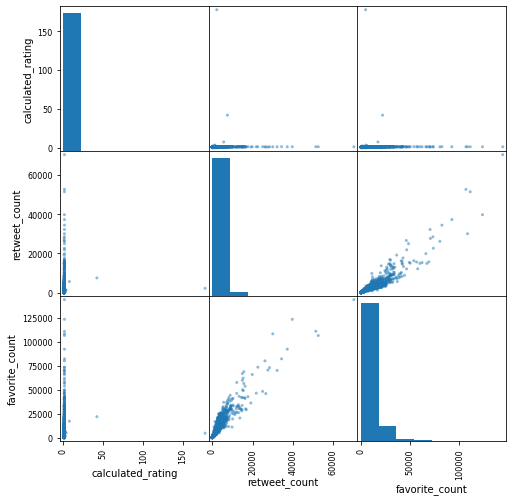

In [47]:
#Using a scatter matrix to show the relationship between the ratings, retweets and favorites
pd.plotting.scatter_matrix(master_data.iloc[:, 9:15], figsize = (8,8), hist_kwds={'bins':8});

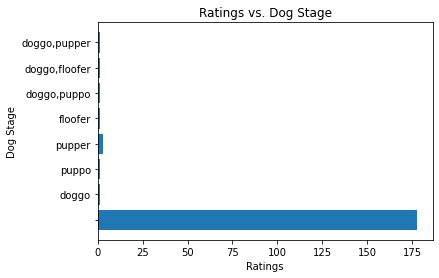

In [48]:
#Plotting a bar graph to show what dog stage receives the highest rating
plt.barh(master_data["dog_stage"],master_data["calculated_rating"] )
plt.xlabel("Ratings")
plt.ylabel("Dog Stage")
plt.title("Ratings vs. Dog Stage");

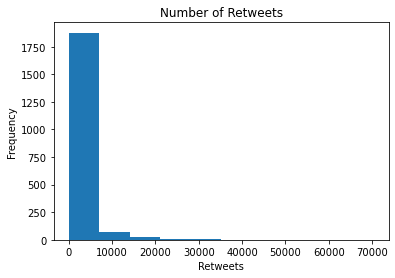

In [66]:
#Plotting a histogram to show the number of retweets and their frequency
plt.hist(master_data["retweet_count"])
plt.xlabel("Retweets")
plt.ylabel("Frequency")
plt.title("Number of Retweets");

### Conclusion

There seems to be a positive correlation between the two variables-retweets and favourites. An increase in one leads to an increase in the other. However, the ratings seem to be unaffected by these two.

The most popular dog stage based on ratings appears to be unnamed. This might necessitate further investigation and cleaning. The second most popular dog-stage is the pupper, with the least popular being the floofer.

Most of WeRateDogs tweets tend to get about 10,000 retweets. However, there are instances where a tweet has been retweeted 70,000 times.

Generally, this dataset needs additional cleaning before insights can be drawn with certainity.